In [1]:
from zlib import crc32
import numpy as np

if __name__=='__main__':
    mail = input('Enter phystech e-mail\n') 
    seed = crc32(mail.strip().encode('utf-8'))%(2**32 - 1)
    rs = np.random.RandomState(seed)
    print('Your tasks are:')
    print(
        '1.{}, 2.{}, 3.{}, 4.{}, 5.{}, 6.{}'.format(
            rs.randint(low=1, high=5), 
            rs.randint(low=1, high=5), 
            rs.randint(low=1, high=5), 
            rs.randint(low=1, high=4), 
            rs.randint(low=1, high=3), 
            rs.randint(low=1, high=3)))

Enter phystech e-mail
kuznetsov.a@phystech.edu
Your tasks are:
1.3, 2.1, 3.3, 4.2, 5.2, 6.1


## Задача 1.3
Проверить мощность и консервативность критерия Уликоксона о равенстве медиан для выборок вида:
<p align="center">
X1: ~ alpha * N(0,1) + (1-alpha) * N(2, 4);
</p>
<p align="center">
X2: ~ alpha * N(0,1) + (1-alpha) * N(2, 4) + delta.
</p>

Здесь delta --- сдвиг, дающий возможность разделить выборки X1 и X2.


Изучить зависимость от alpha и delta.


In [24]:
import numpy as np
from scipy.stats import norm, wilcoxon
from matplotlib import pyplot as plt

In [25]:
def sample_single(alpha,delta):
    assert 0 <= alpha and alpha <= 1
    if np.random.rand() <= alpha:
        return norm(0,1).rvs() + delta
    else:
        return norm(2,4).rvs() + delta
    
def sample(size=100, alpha=0.5, delta=0):
    return [sample_single(alpha, delta) for i in range(size)]
    

Text(0, 0.5, 'p-value')

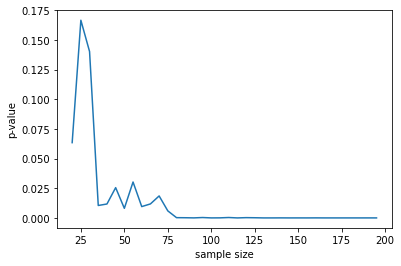

In [52]:
average_over = 5

n_array = list(range(20,200, 5))
plt.plot(n_array,
         [sum([wilcoxon(sample(size=n), sample(size=n, delta=2)).pvalue for i in range(average_over)])/average_over
          for n in n_array])
plt.xlabel('sample size')
plt.ylabel('p-value')

Видим, что при уведичении размера выборки при alpha = 0.5, delta=2 p-value стремиться к нулю, из чего можно сделать вывод о том, что критерий разделяет выборки адекватно.

Далее посчитаем мощность критерия и False Positive Rate в зависимости от delta при фиксированном alpha=0.5

In [78]:
n_experiments = 100  # Количество экспериментов для подсчёта мощности и False Positive Rate 
                     # для фиксированных alpha и delta
n = 100   # Размер выборки
a = 0.05  # Уровень значимости


def perform_exp(alpha, delta):
    FPR = sum([wilcoxon(sample(size=n, alpha=alpha), sample(size=n, alpha=alpha)).pvalue < 0.05 for exp in range(n_experiments)])/n_experiments
    power sum([wilcoxon(sample(size=n, alpha=alpha), sample(size=n, alpha=alpha)).pvalue < 0.05 for exp in range(n_experiments)])/n_experiments
    return FPR, power

In [88]:
deltas = [0,0.2,0.5,0.7,1,2,4,6,10]

results_deltas = np.array([perform_exp(alpha=0.5, delta=d) for d in deltas])

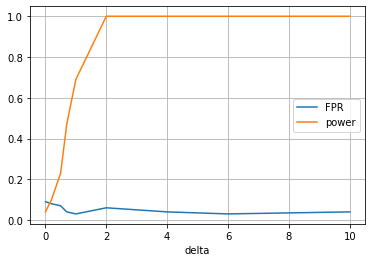

In [89]:
plt.plot(deltas, results_deltas[:, 0], label="FPR")
plt.plot(deltas, results_deltas[:, 1], label="power")
plt.xlabel('delta')
plt.grid()
plt.legend()

Получили зависимость мощности критерия от параметра delta. Видно, что чем больше delta (чем проще разделить выборки теоритически), тем больше мощность критерия. 

В то же время критерий не консервативен - значение ошибки первого рода принимает значения вокруг выбранного уровня значимости 0.05 при всех delta. (Если бы был консервативным, то мы бы получили FPR меньше 0.05)

Далее посчитаем мощность критерия и False Positive Rate в зависимости от alpha при фиксированном delta=1


In [86]:
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]

results_alphas = np.array([perform_exp(alpha=alpha, delta=1) for alpha in alphas])

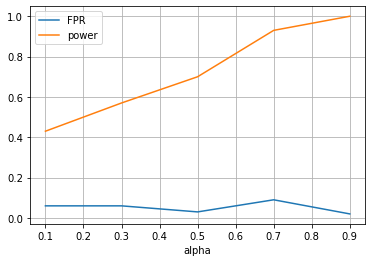

In [87]:
plt.plot(alphas, results_alphas[:, 0], label="FPR")
plt.plot(alphas, results_alphas[:, 1], label="power")
plt.xlabel('alpha')
plt.grid()
plt.legend()

Видно, что чем больше alpha, тем проще критерий разделяет выборки (больше мощность). Я предполагаю, что это из за того что N(0,1) имеет меньшую дисперсию, чем N(2,4). 